In [1]:
import keras
from keras.applications.resnet50 import ResNet50
from keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten

num_classes = 2
input_shape = (224, 224, 3)
pre_trained_model = ResNet50(input_shape = (224, 224, 3), include_top = False, pooling = 'avg', weights = 'imagenet')

for layer in pre_trained_model.layers: 
    layer.trainable = False
    
final_layer = pre_trained_model.layers[-1]
#print('final layer output shape: ', final_layer.output_shape)
print('final layer output shape: ', final_layer.compute_output_shape(input_shape))
final_output = final_layer.output



final layer output shape:  (224, 3)


In [2]:
from tensorflow.keras.optimizers import Adam
x = layers.Flatten()(final_output)

x = layers.Dense(100, activation='relu')(x)
x = layers.Dropout(0.5)(x)                  

x = layers.Dense  (num_classes, activation='softmax')(x) 

my_new_model = Model( pre_trained_model.input, x) 

my_new_model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


my_new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,792,814 (90.76 MB)

 Trainable params: 205,102 (801.18 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [3]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from PIL import Image

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        './training',
        target_size=(image_size, image_size),
        batch_size=5,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        './validation',
        target_size=(image_size, image_size),
        class_mode='categorical')
print("Train Shape", train_generator[0][0].shape, "Valid Shape:", validation_generator[0][0].shape)

history = my_new_model.fit(
        train_generator,
        epochs = 50,
        steps_per_epoch=5,
        validation_data=validation_generator,
        validation_steps=1)

Found 62 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Train Shape (5, 224, 224, 3) Valid Shape: (27, 224, 224, 3)
Epoch 1/50


C:\Users\kadoo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 888ms/step - accuracy: 0.5478 - loss: 1.2915 - val_accuracy: 0.5926 - val_loss: 0.7910
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.5850 - loss: 0.8698
Epoch 3/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.2000 - loss: 1.2508

C:\Users\kadoo\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - accuracy: 0.3200 - loss: 1.0900 - val_accuracy: 0.6296 - val_loss: 0.6607
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.4867 - loss: 0.9923
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 368ms/step - accuracy: 0.7363 - loss: 0.6170 - val_accuracy: 0.6667 - val_loss: 0.6391
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5600 - loss: 0.6003 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - accuracy: 0.5506 - loss: 0.7829 - val_accuracy: 0.7407 - val_loss: 0.5846
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.5587 - loss: 0.7834
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 340ms/step - accuracy: 0.5400 - loss: 0.7120 - val_accuracy: 0.7778 - val_loss: 0.5641
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.6661 - loss: 0.5408
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 399ms/step - accuracy: 0.6560 - loss: 0.5882 - val_accuracy: 0.7778 - val_loss: 0.5533
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102

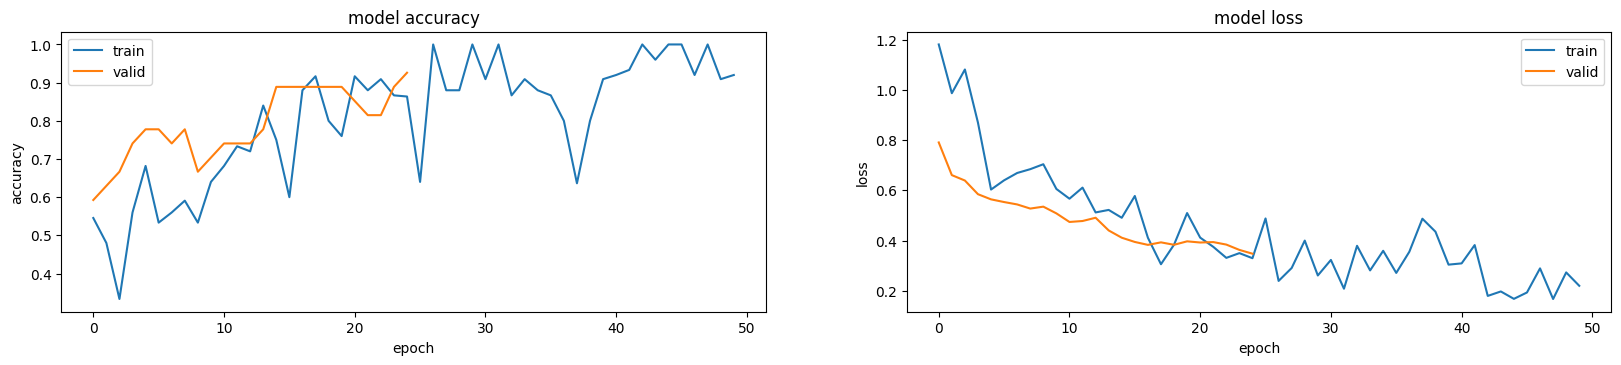

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

#import cv2
plt.figure(1, figsize = (20,8)) 
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

#### Save the model

In [5]:
my_new_model.save("model.keras")

#### Test images are kept in a single subdirectory "All". They are prefixed GOOD or BAD to check the ground truth after the model evaluates the images

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup test data generator with normalization
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = data_generator.flow_from_directory(
    directory = './test',
    target_size = (image_size, image_size),
    batch_size = 1,
    class_mode = 'binary',
    shuffle = False,
    seed = 101
)

Found 16 images belonging to 1 classes.


#### Load the saved model to test the unseen samples

In [7]:
from keras.models import load_model
my_loaded_model = load_model("model.keras")
my_loaded_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,203,020 (92.33 MB)

 Trainable params: 205,102 (801.18 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 410,206 (1.56 MB)

In [8]:
import numpy as np
test_generator.reset()
steps = test_generator.samples
print(steps)
#pred = my_loaded_model.predict(test_generator, steps, verbose = 1)
pred = my_loaded_model.predict(test_generator, steps, verbose=1)


predicted_class_indices = np.argmax(pred, axis = 1)

16


C:\Users\kadoo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


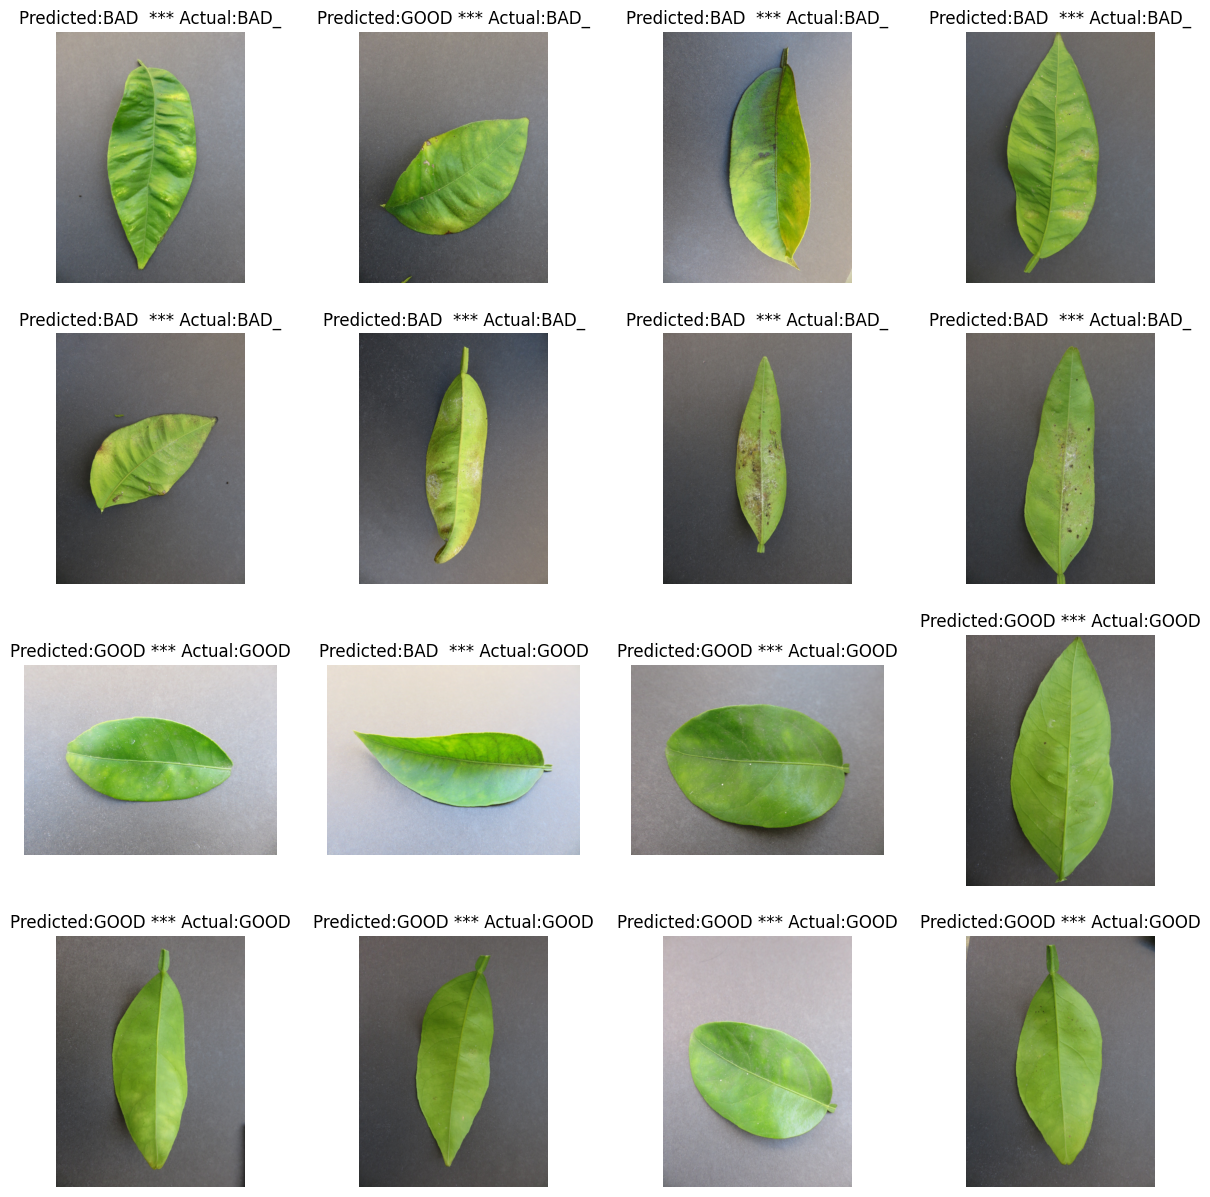

In [9]:
import cv2

TEST_DIR = './test/'
f, ax = plt.subplots(4, 4, figsize = (15, 15))

for i in range(0,16):
    imgBGR = cv2.imread(TEST_DIR + test_generator.filenames[i])
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    fname = TEST_DIR + test_generator.filenames[i]
    aname = fname.split('/')[2].split('\\')[1][:4]
    
    
    # Good if condition else Bad
    predicted_class = "GOOD" if predicted_class_indices[i] else "BAD "

    ax[i//4, i%4].imshow(imgRGB)
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title("Predicted:{} *** Actual:{}".format(predicted_class, aname))    

plt.show()